## Creating and plotting Taylor models in one variable

In [77]:
using Revise, TaylorModels, Plots, TaylorSeries, IntervalArithmetic
using TaylorSeries: gradient, jacobian

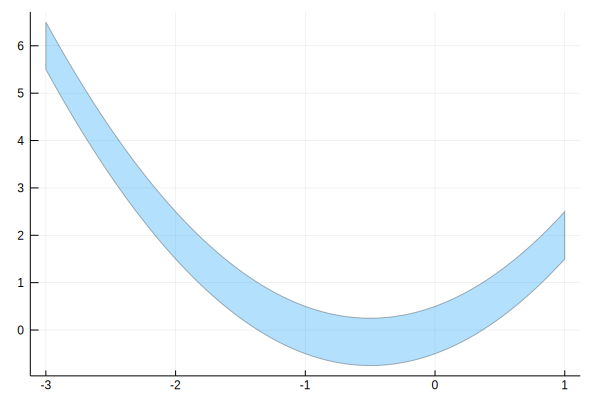

In [14]:
m = 4
p = Taylor1([0.0, 1.0, 1.0], m)
δ = 0.5; I = Interval(-δ, δ)
x₀ = Interval(0.0)
D = Interval(-3.0, 1.0)
TM = TaylorModel1(p, I, x₀, D)

plot(TM, label="")

In [15]:
TM.pol # the polynomial field

 1.0 t + 1.0 t² + 𝒪(t⁵)

In [16]:
TM.dom # the domain

[-3, 1]

In [17]:
TM.rem # the interval remainder

[-0.5, 0.5]

If we enlarge the interval remainder, the TM covers a larger region:

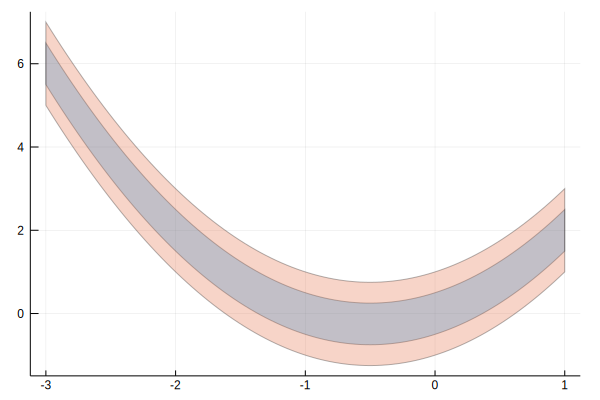

In [18]:
δ = 1.0; I = Interval(-δ, δ)
plot!(TaylorModel1(p, I, x₀, D), label="")

## Taylor models in three variables

In [40]:
m = 4
x₁, x₂, x₃ = set_variables(Float64, ["x₁", "x₂", "x₃"], order=2*m)

3-element Array{TaylorN{Float64},1}:
  1.0 x₁ + 𝒪(‖x‖⁹)
  1.0 x₂ + 𝒪(‖x‖⁹)
  1.0 x₃ + 𝒪(‖x‖⁹)

In [47]:
p = (1 + x₁ - x₂, x₃ - x₁)

( 1.0 + 1.0 x₁ - 1.0 x₂ + 𝒪(‖x‖⁹),  - 1.0 x₁ + 1.0 x₃ + 𝒪(‖x‖⁹))

In [63]:
x₀ = Interval(2.0, 2.0) × Interval(0.0, 0.0) × Interval(0.0, 0.0)

Dx₁ = Interval(1.0, 3.0)
Dx₂ = Interval(-1.0, 1.0)
Dx₃ = Interval(-1.0, 0.0)
D = Dx₁ × Dx₂ × Dx₃

δ = 0.5; I = Interval(-δ, δ)

TM2 = TaylorModelN(p[2], I, x₀, D)

 - 1.0 x₁ + 1.0 x₃ + [-0.5, 0.5]

## Normalization

In [19]:
TM.pol

 1.0 t + 1.0 t² + 𝒪(t⁵)

In [154]:
q = [normalize_taylor(p[1], D, true), normalize_taylor(p[2], D, true)]

2-element Array{TaylorN{Float64},1}:
    3.0 + 1.0 x₁ - 1.0 x₂ + 𝒪(‖x‖⁹)
  - 2.5 - 1.0 x₁ + 0.5 x₃ + 𝒪(‖x‖⁹)

## Overapproximation of a first order taylor model with a zonotope

See Lemma 2.4.8 page 52 of Chen's thesis.

We consider the same example as above but in only one variable, $x_1$, so the resulting sets can be plotted.

In [256]:
using LazySets: Zonotope, vertices_list, minkowski_sum, convex_hull

In [270]:
m = 4
x₁ = Taylor1([0.0, 1.0, 0.0], m)

p = 1 + x₁

x₀ = Interval(0.0, 0.0)

Dx₁ = Interval(-1.0, 3.0)
D = Dx₁

δ = 0.5; I = Interval(-δ, δ)

TM1 = TaylorModel1(p, I, x₀, D)

 1.0 + 1.0 t + [-0.5, 0.5]

Note that:

- $\min_{Dx₁} (p, I)$ is achieved at $x₁ = -1$, with value $-0.5$
- $\max_{Dx₁} (p, I)$ is achieved at $x₁ = 3$, with value $4.5$

The exact range of this TM is then the interval $R_{(p, I)} = [-0.5, 4.5]$.

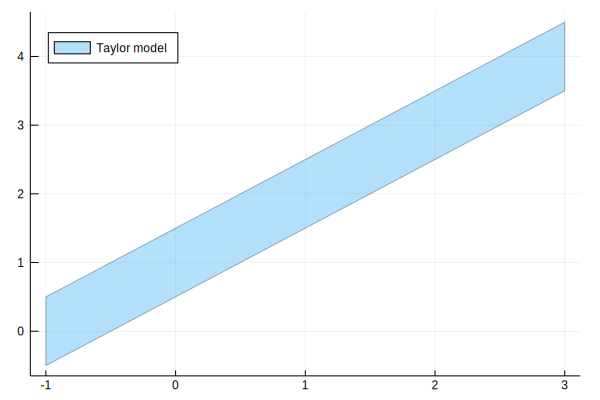

In [273]:
plot(TM1, label="Taylor model", legend=:topleft)

In [274]:
# normalize the polynomial to the symmetric interval [-1, 1]
q = normalize_taylor(TM1.pol, D, true)

 2.0 + 2.0 t + 𝒪(t⁵)

In [275]:
# box overapproximation of the range
evaluate(TM1, D)

[-0.5, 4.5]

In [276]:
# zonotopic overapproximation of the range
Zp = Zonotope([2.0], hcat([2.0]))

Zonotope{Float64}([2.0], [2.0])

In [278]:
convex_hull(vertices_list(Z))

2-element Array{Array{Float64,1},1}:
 [1.5]
 [4.5]

Finall we take the minkowski sum with the interval remainder:

In [279]:
# zonotope for the interval remainder
ZI = Zonotope([0.0], hcat([δ]))

Zonotope{Float64}([0.0], [0.5])

In [280]:
vertices_list(ZI)

2-element Array{Array{Float64,1},1}:
 [0.5] 
 [-0.5]

In [281]:
Z = minkowski_sum(Zp, ZI)

Zonotope{Float64}([2.0], [2.0 0.5])

In [282]:
convex_hull(vertices_list(Z))

2-element Array{Array{Float64,1},1}:
 [-0.5]
 [4.5] 

We conclude that, in this example, *both* the box overapproximation and the zonotope enclosure are exact with respect to the range of this Taylor model. Note in particular that `TM1` in purely linear.

## Overapproximation of a taylor model in two variables with a zonotope

In [283]:
m = 4
x₁, x₂ = set_variables(Float64, ["x₁", "x₂"], order=2*m)

┌ Warning: omitting call expression (Core.apply_type)(LazySets.VPolygon, N<:Real, VN<:AbstractArray{N<:Real,1}) in ("none", 0)
└ @ Revise /Users/forets/.julia/packages/Revise/UtBAC/src/lowered.jl:169
┌ Warning: omitting call expression (Core.apply_type)(LazySets.VPolygon, N<:Real, VN<:AbstractArray{N<:Real,1}) in ("none", 0)
└ @ Revise /Users/forets/.julia/packages/Revise/UtBAC/src/lowered.jl:169
┌ Warning: omitting call expression (Core.apply_type)(LazySets.VPolygon, N<:Real, VN<:AbstractArray{N<:Real,1}) in ("none", 0)
└ @ Revise /Users/forets/.julia/packages/Revise/UtBAC/src/lowered.jl:169
┌ Warning: omitting call expression (Core.apply_type)(LazySets.VPolygon, N<:Real, VN<:AbstractArray{N<:Real,1}) in ("none", 0)
└ @ Revise /Users/forets/.julia/packages/Revise/UtBAC/src/lowered.jl:169


2-element Array{TaylorN{Float64},1}:
  1.0 x₁ + 𝒪(‖x‖⁹)
  1.0 x₂ + 𝒪(‖x‖⁹)

In [285]:
p = (1 + x₁ - x₂, - x₁)

( 1.0 + 1.0 x₁ - 1.0 x₂ + 𝒪(‖x‖⁹),  - 1.0 x₁ + 𝒪(‖x‖⁹))

In [ ]:
x₀ = Interval(2.0, 2.0) × Interval(0.0, 0.0) × Interval(0.0, 0.0)

Dx₁ = Interval(1.0, 3.0)
Dx₂ = Interval(-1.0, 1.0)
Dx₃ = Interval(-1.0, 0.0)
D = Dx₁ × Dx₂ × Dx₃

δ = 0.5; I = Interval(-δ, δ)

TM2 = TaylorModelN(p[2], I, x₀, D)